<a href="https://colab.research.google.com/github/Steffenanderson/Machine-Learning-Exercises/blob/main/KMeans_Exercise_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans Clustering

**Task**

Your task is to perform customer segmentation using KMeans. We are interested in grouping our customers into groups based on similar characteristics. This can help the company effectively allocate marketing resources. We will use customer age, education years of employment, income, debt, whether they defaulted, and debt: income ratio to group them into segments.

You can download the data here. The original data is from this data source.

**Part 1**

Use KMeans to create various customer segments.

**Part 2**

Explore your various customer segments. What are trends in the segments? Create at least two visualizations that explore trends in the groups.

## Import Libraries & Mount Drive

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')
import random
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px


cust = pd.read_csv('/content/drive/MyDrive/cust_seg.csv', index_col=0)
cust.head().T

,0,1,2,3,4
Customer Id,1.000,2.000,3.000,4.000,5.000
Age,41.000,47.000,33.000,29.000,47.000
Edu,2.000,1.000,2.000,2.000,1.000
Years Employed,6.000,26.000,10.000,4.000,31.000
Income,19.000,100.000,57.000,19.000,253.000
Card Debt,0.124,4.582,6.111,0.681,9.308
Other Debt,1.073,8.218,5.802,0.516,8.908
Defaulted,0.000,0.000,1.000,0.000,0.000
DebtIncomeRatio,6.300,12.800,20.900,6.300,7.200


## Exploratory Data Analysis (EDA)


*   DataFrame Characteristics
*   Identify and Impute Missing Data



####  DataFrame Characteristics

In [236]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        850 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


In [237]:
cust.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,850.0,35.029412,8.041432,20.000,29.00000,34.000,41.00000,56.000
Edu,850.0,1.710588,0.927784,1.000,1.00000,1.000,2.00000,5.000
Years Employed,850.0,8.565882,6.777884,0.000,3.00000,7.000,13.00000,33.000
Income,850.0,46.675294,38.543054,13.000,24.00000,35.000,55.75000,446.000
Card Debt,850.0,1.576820,2.125843,0.012,0.38250,0.885,1.89850,20.561
Other Debt,850.0,3.078773,3.398799,0.046,1.04575,2.003,3.90325,35.197
Defaulted,850.0,0.391765,0.488432,0.000,0.00000,0.000,1.00000,1.000
DebtIncomeRatio,850.0,10.171647,6.719441,0.100,5.10000,8.700,13.80000,41.300


In [238]:
cust.apply(lambda x: len(x.unique()))

Age                 37
Edu                  5
Years Employed      33
Income             129
Card Debt          727
Other Debt         788
Defaulted            2
DebtIncomeRatio    245
dtype: int64

In [239]:
# list of numerical features
num_col = []
for x in cust.dtypes.index:
  if cust.dtypes[x] == 'float64' or 'int64':
      num_col.append(x)
num_col

# num_col review
for col in num_col:
  print(col)
  print(cust[col].value_counts())
  print()

Age
29    51
31    42
39    41
35    40
28    38
34    38
41    36
27    33
36    33
40    32
33    31
37    31
24    30
26    30
30    30
32    30
38    30
25    25
43    22
47    22
23    21
45    21
48    19
46    18
42    16
44    15
22    14
21    12
50    11
52     9
51     7
53     7
49     5
54     4
56     2
55     2
20     2
Name: Age, dtype: int64

Edu
1    460
2    235
3    101
4     49
5      5
Name: Edu, dtype: int64

Years Employed
0     72
1     59
4     57
6     53
9     52
2     50
3     50
5     49
7     45
12    38
8     38
10    38
16    33
11    32
13    32
15    23
18    22
19    17
14    16
17    14
22    13
21    10
20     7
23     6
24     5
25     4
31     3
27     3
30     3
29     2
33     2
26     1
28     1
Name: Years Employed, dtype: int64

Income
21     28
26     27
25     27
22     26
27     25
       ..
123     1
132     1
135     1
136     1
13      1
Name: Income, Length: 129, dtype: int64

Card Debt
0.694    5
0.242    4
0.185    3
0.025    3
0.37

#### Identify and Impute Missing Data

In [219]:
total_df = cust.isnull().sum().sort_values(ascending=False)
percent_missing1 = cust.isnull().sum()/cust.isnull().count() * 100
percent_missing2 = (round(percent_missing1, 1)).sort_values(ascending=False)
missing_table = pd.concat([total_df, percent_missing2,],
                          axis=1, keys=['Total','% Missing'])
missing_table.head(1)

,Total,% Missing
Defaulted,150,17.6


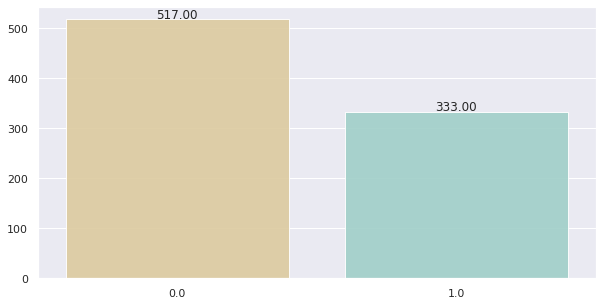

In [220]:
cust.Defaulted.fillna(1.0, inplace=True)
fig = plt.figure(figsize = (10, 5))
ax = plt.subplot()

default_count = cust.Defaulted.value_counts()
ax = sns.barplot(default_count.index, 
                 default_count.values, 
                 alpha=0.9, 
                 palette='BrBG')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show();

**Rationale:**

      Imputted 1.0 for missing data to remediate imbalance.

## Visualization

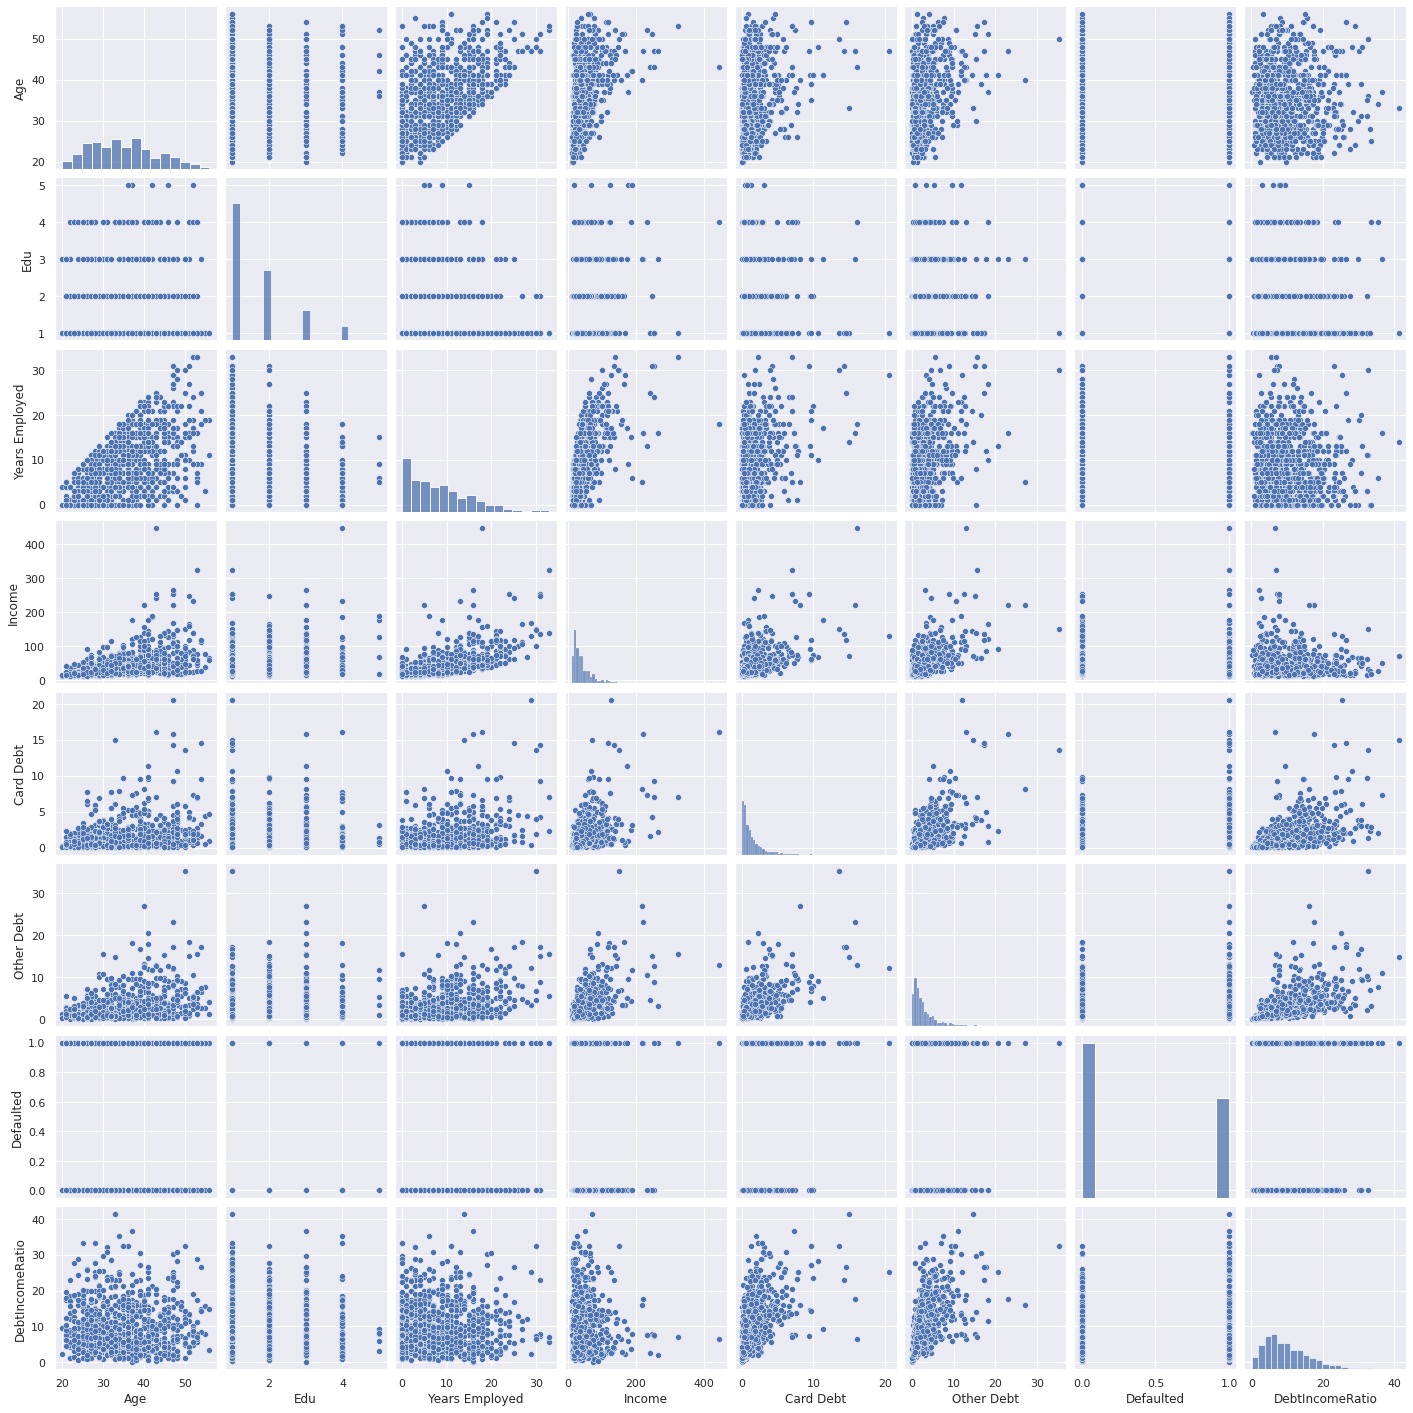

In [223]:
cust.drop(columns='Customer Id',inplace=True)
sns.pairplot(cust, kind='scatter');

# Modeling

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(cust)

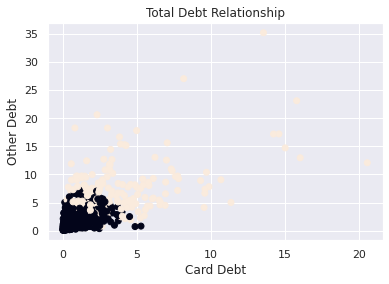

In [251]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
cust['cluster'] = kmeans.labels_
plt.scatter(cust['Card Debt'], cust['Other Debt'], c = cust['cluster'], )
plt.xlabel('Card Debt')
plt.ylabel('Other Debt')
plt.title('Total Debt Relationship');

In [256]:
fig1 = px.scatter(cust, x='Card Debt', y='Other Debt', color="Defaulted",
                 size='DebtIncomeRatio')
fig1.update_layout(title='4 Features KMeans (Size= Debt Income Ratio)')
fig1.show()

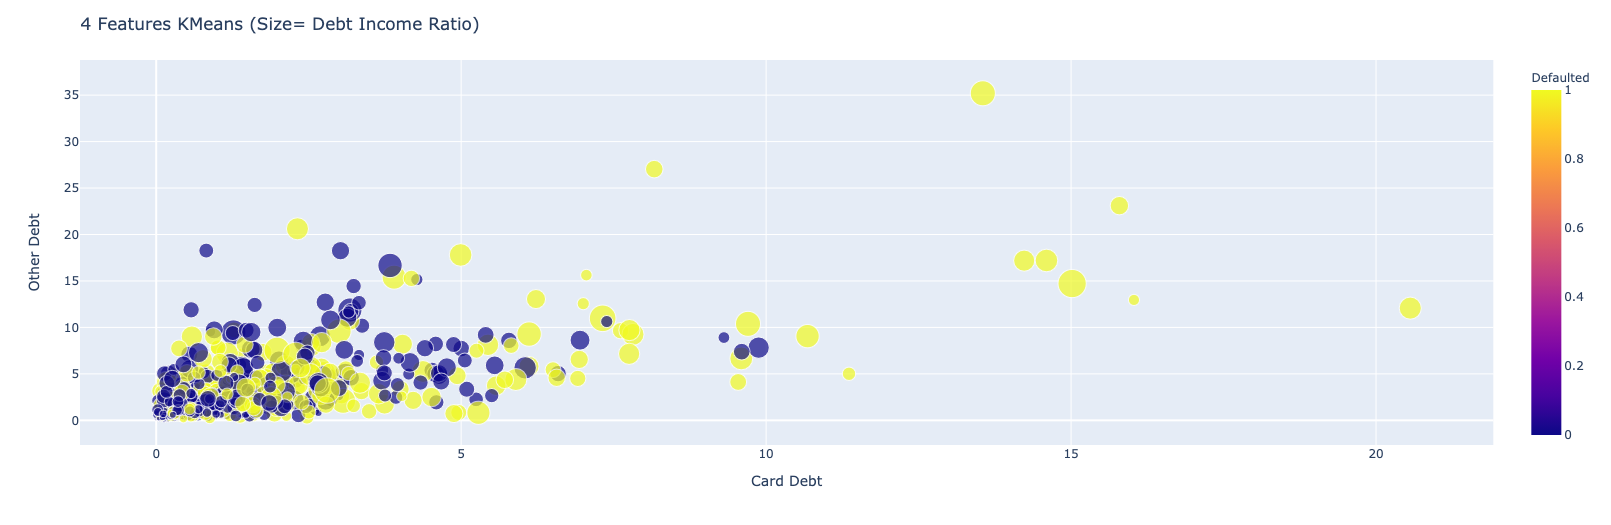

**Observations:**

      There is a positive correlation between low total debt, Debt Income Ratio and Defaults.
      All Customer Defaults are less than 10 Card Debt and less than 20 Other Debt.
      A majortity of the Customer Defaults outside the above mentioned range have a large Debt Income Ratio and carry more Card Debt than Other Debt.

In [266]:
fig2 = px.scatter(cust, x='Card Debt', y='Years Employed', color="Defaulted",
                 size='DebtIncomeRatio')
fig2.update_layout(title='4 Features KMeans (Size= Debt Income Ratio)')
fig2.show()

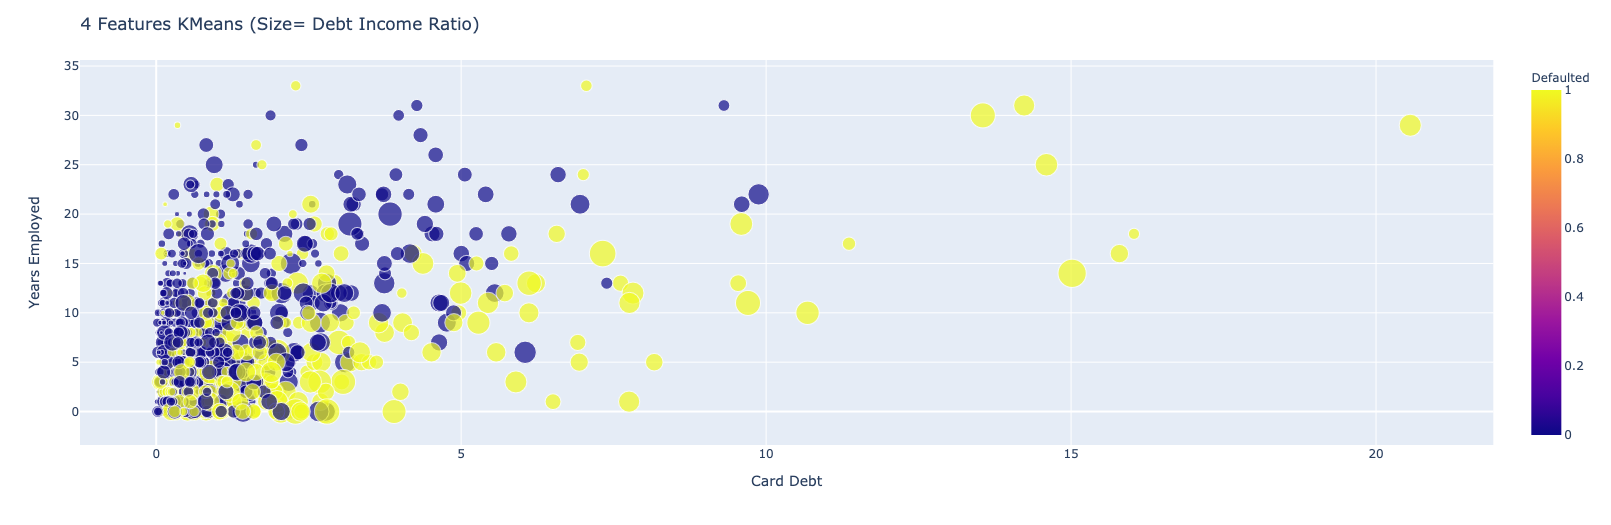

**Observations:**
    
      There is a positive correlation between Years Employeed and Card Debt.
      A majority of Customers who have between 4 - 7 Card Debt and have 10 - 30 years employed carry a larger Debt Income Ratio but do not Default.
      A majority of Customer Defaults have less then 20 years employment, and large Debt Income Ratios

# Citations

1. https://towardsdatascience.com/clustering-with-more-than-two-features-try-this-to-explain-your-findings-b053007d680a